# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [7]:
# number of callbacks for black-sounding names
print(sum(data[data.race=='b'].call), sum(data[data.race=='w'].call))
print(len(data[data.race=='b']), len(data[data.race=='w']))
print(len(data))

157.0 235.0
2435 2435
4870


In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


#### 1. What test is appropriate for this problem? Does CLT apply?

##### Answer:
Is the rate of callbacks for black sounding names significantly different than the rate of call backs for white sounding names?
Our null hypothesis is that the black or white sounding names does not have a significant impact, in other words, when the resume is presented to the employer there is an equal chance to receive a call back.

We can simulate this as a Bernoulli trial where receiving a call back would be considered a success. We then generate 10000 of such trial for balck and white sounding name respectively. Then we can perform a two-sample ztest to investigate if the two distributions are significantly different comparing their mean values.

0.064476386037
0.0965092402464


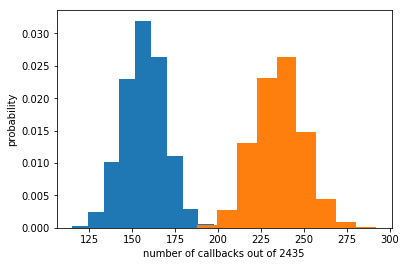

In [28]:
import matplotlib.pyplot as plt

# probablity of receiving a call back with black soundign name
n_bcallback = len(data[data.race=='b'])
p_bcallback = sum(data[data.race=='b'].call)/n_bcallback
print(p_bcallback)

# simulate 10000 Bernoulli trials
bernouli_trials_b = np.random.binomial(len(data[data.race=='b']), p_bcallback, 10000)
_= plt.hist(bernouli_trials_b, normed = True)

# probablity of receiving a call back with black soundign name
n_wcallback = len(data[data.race=='w'])
p_wcallback = sum(data[data.race=='w'].call)/n_wcallback
print(p_wcallback)

# Simulate 10000 Bernoulli trials
bernouli_trials_w = np.random.binomial(len(data[data.race=='w']), p_wcallback, 10000)
_= plt.hist(bernouli_trials_w, normed = True)
_= plt.xlabel("number of callbacks out of 2435")
_= plt.ylabel('probability')

plt.show()

In [21]:
# compte a two-sample z-test on the above distributions
from statsmodels.stats.weightstats import ztest
z = ztest(bernouli_trials_b, bernouli_trials_w)
print("Z-value : %6.3F, p-value: %6.9F"% (abs(z[0]), z[1]))

Z-value : 408.883, p-value: 0.000000000


As we observe the p-value is very small rejecting the null hypothesis that the two distributions are not significantly different. In other words, the difference we observe in the distributions is not due to chance. Also fromt he above plots, we can observe that hte sampling distributions have a close to normal distribution and therfore the CLT applies.

Another way to approach this problem is using a proportion ztest right from the beginning:

In [25]:
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([sum(data[data.race=='b'].call), sum(data[data.race=='w'].call)])
nobs = np.array([len(data[data.race=='b']), len(data[data.race=='w'])])
stat, pval = proportions_ztest(counts, nobs)
print('{0:0.63f}'.format(pval))

0.000039838868375850766678780701113282702863216400146484375000000


We again get a very small p-value indicating that the difference in the observed values are significant and not due to chance.

#### 2. What are the null and alternate hypotheses?

##### Answer:
Null hypothesis: Race does not have a significant impact on the whether or not a person receives call back.

Alternate hypothesis: having black or white sounding names hasa significant impact on whether or not a person receives a call back.

#### 3. Compute margin of error, confidence interval, and p-value.

##### Answer:
I follow the steps on how to compute the confidence interval and the margin of errors for two proportions:
1. Identify a sample statistic. Use the sample proportions (p1 - p2) to estimate the difference between population proportions (P1 - P2).
2. Select a confidence level. The confidence level describes the uncertainty of a sampling method. Often, researchers choose 90%, 95%, or 99% confidence levels; but any percentage can be used.
3. Find the margin of error by computig the standard error (SE) of the difference between proportions, SE = sqrt{ [p1 * (1 - p1) / n1] + [p2 * (1 - p2) / n2] } 

4. Specify the confidence interval. The range of the confidence interval is defined by the sample statistic + margin of error. And the uncertainty is denoted by the confidence level.


In [36]:
# compute the sample proportions difference
p_sample_diff = p_bcallback - p_wcallback
print('The difference of the two samples callbacks proportions is: %.4f' % p_sample_diff)

# find the standard error of the difference between proportions
se_diff = np.sqrt((p_bcallback*(1-p_bcallback)/n_bcallback) + (p_wcallback*(1-p_wcallback)/n_wcallback))

# for a 0.95 confidence interval the critical value of the zscore is 1.96 for a two-tailed scenario
margin = 1.96 * se_diff
print('The margin of error of the difference of the two samples callbacks proportions is: %.4f' % margin)

CI = [p_sample_diff + margin, p_sample_diff - margin]
print("95% confidence interval" , (CI[1],CI[0]))


The difference of the two samples callbacks proportions is: -0.0320
The margin of error of the difference of the two samples callbacks proportions is: 0.0153
95% confidence interval (-0.047288260559332024, -0.016777447859559147)


Therefore, the 95% confidence interval is -0.05 to -0.017. That is, we are 95% confident that the true difference between population proportion is in the range defined above. Since both ends of the confidence interval are negative, we can conclude that there were fewer call backs on the black soundign names than that of thw ehite sounding names. The p-value of teh z-statistics is 0.0004 indicating that the difference in proportion is significant.

#### 4. Write a story describing the statistical significance in the context or the original problem. 

##### Answer:
please refer to the previous answers.

#### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

##### Answer:
Not necessarily as we would also need to consider the impact of other features on the number of call backs. For example, the level education and the number of previous jobs could be positively correlated with the number of call backs. Therefore, further such analysis is necessary before deriving a conlusion.